In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# samples = np.random.normal(0, 1, 5000000)
import sklearn

In [4]:
df = pd.read_csv("./UCI data/mushroom_mixed.csv", sep=None, engine='python', na_values='?')
index_constant = np.where(df.nunique() == 1)[0]
constant_columns = [df.columns[i] for i in index_constant]
df = df.drop(columns=constant_columns)
df = df.dropna()
cat_data = df.select_dtypes('object').astype('category')
for c in cat_data:
    df = df.assign(**{c: cat_data[c]})
float_data = df.select_dtypes('number').astype('float64')
for c in float_data:
    df = df.assign(**{c: float_data[c]})


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# enc_cat = encoder.fit_transform(cat_data)

ValueError: y should be a 1d array, got an array of shape (0, 17) instead.

In [6]:
enc_cat

array([2, 2, 0, ..., 2, 0, 2])

/tmp/ipykernel_472075/2841691213.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( enc_cat, palette="crest",


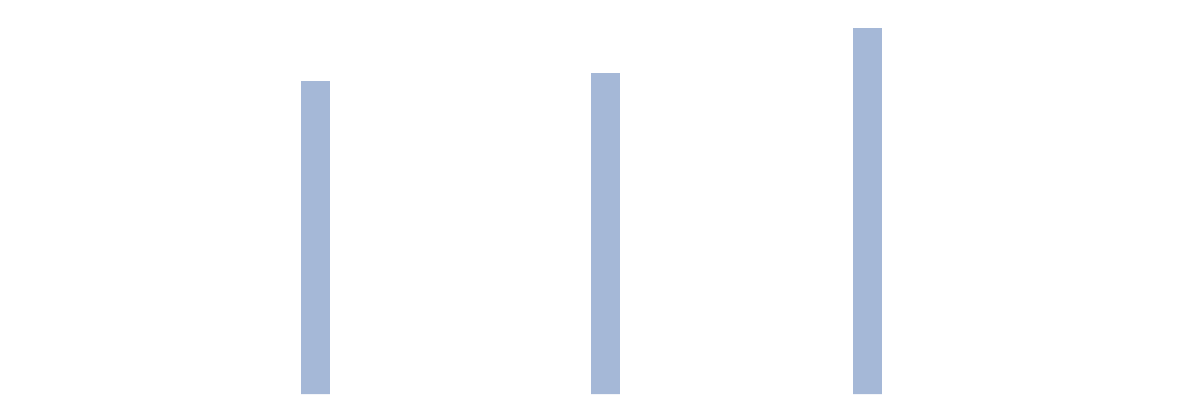

In [14]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white'})
sns.histplot( enc_cat, palette="crest",
   alpha=.5, linewidth=0,bins=20)
plt.xticks([])
plt.yticks([])
plt.ylabel("")
plt.xlim(np.min(enc_cat) - 1, np.max(enc_cat) + 1)
plt.savefig("discrete_logo.svg")

In [ ]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white'})
sns.distplot( samples,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
plt.xticks([])
plt.yticks([])
plt.ylabel("")
plt.xlim(-4, 4)
plt.savefig("norm_logo.png")

In [4]:
# samples1 = np.random.normal(-0.75, 0.5, 5000000)
# samples2 = np.random.normal(0.75, 0.5, 2500000)
# samples = np.concatenate([samples1, samples2])

In [ ]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white'})
sns.kdeplot( samples,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
plt.xticks([])
plt.yticks([])
plt.ylabel("")
plt.xlim(-3, 3)
plt.savefig("KDE_logo.svg")

In [6]:
import importlib
import pybnesian as pbn

import numpy as np
import os
import json
import shutil

from dash import Dash, jupyter_dash, html, Input, Output, State, callback, callback_context, dcc, no_update
from dash_extensions.enrich import DashProxy, LogTransform, DashLogger
from flask import session
from flask_session import Session
from flask_caching import Cache  # Import Cache for caching
# import redis
import dash_ag_grid as dag
import dash_cytoscape as cyto
import networkx as nx
import pandas as pd

import importlib
import frontend
import callbacks
importlib.reload(frontend)
importlib.reload(callbacks)
import pickle
from frontend import *

In [7]:
# from pybnesian import Score
# class Be(Score):

#     def __init__(self, df: pd.DataFrame):
#         Score.__init__(self)
#         self.variables = df.columns
#         self.df = df
#         self.discrete = [x_name for x_name, x in df.items() if x.dtype == 'int']
#         self.continuous = [var for var in df.columns if var not in self.discrete]
#         if self.discrete:
#             self.BDe_score = pbn.BDe(self.df)
#         if self.continuous:
#             self.BGe_score = pbn.BGe(self.df)
    
#     def has_variables(self, vars):
#         return set(vars).issubset(set(self.variables))

#     def compatible_bn(self, model):
#         return type(model).__name__ in ['DiscreteBN', 'GaussianNetwork', 'CLGNetwork']

#     def local_score(self, model, variable, evidence):
#         var_type = type(model.node_type(variable)).__name__
   
#         if var_type == 'DiscreteFactorType':
#             for e in evidence:
#                 if e in self.continuous:
#                     return -sys.float_info.max
#             return self.BDe_score.local_score(model, variable, evidence)
      
#         elif var_type == 'LinearGaussianCPDType':
            
#             return self.BGe_score.local_score(model, variable, evidence)
        
#     def __str__(self):
#         return 'Be'

In [8]:
df = pd.read_csv('UCI data/asia10K.csv')
    

df = df.dropna(axis=1)
df[df.columns] = df[df.columns].astype("category")

In [9]:
pdag = pbn.PC().estimate(hypot_test=pbn.MutualInformation(
                df=df),nodes=df.columns.to_list(),)

In [10]:
# sepsets = pbn.PC().compute_sepsets_of_size(pbn.PartiallyDirectedGraph().CompleteUndirected(
#             nodes=df.columns.to_list()),
#                                                    pbn.MutualInformation(
#                 df=df),
                                                   
#                                                    [],
#                                                    [],
#                                                    [],
#                                                    [],
#                                                    1)

In [11]:
# import random
# pdag = pbn.PartiallyDirectedGraph().CompleteUndirected(
#     nodes=df.columns.to_list())

# rows_source = pd.DataFrame(itertools.combinations(df.columns, 2), columns=[
#                                    'Source', 'Target'])
# for idx, row in rows_source.iterrows():
#     if random.randint(0, 10) > 6:
#         pdag.remove_edge(row['Source'], row['Target'])

In [12]:
# x = pbn.PC().compute_v_structures(pdag,
#     pbn.MutualInformation(
#     df=df),
#     alpha=0.05,
#     use_sepsets=False,
#     ambiguous_threshold = 0.5)
# x

In [13]:
pdag.arcs()

[('LungCancer', 'TuberculosisOrCancer'),
 ('Tuberculosis', 'TuberculosisOrCancer')]

In [14]:
pdag.undirect('LungCancer', 'TuberculosisOrCancer')

In [15]:
x = pbn.MeekRules.all_rules_sequential_interactive(pdag,
    )
x

[((4, 1), 1)]

In [10]:
# pdag.arcs()

In [11]:
# pdag.edges()

In [12]:
# pdag.to_dag()

In [13]:
# session_dict = [x for x in session_objects.values()][0]
# op_set = session_dict['op_set']
# score = session_dict['score']


# ghc = pbn.GreedyHillClimbing()
# session_dict['bn'] = ghc.estimate(
#     start=session_dict['bn'],
#     score=score,
#     operators=op_set,
#     arc_blacklist=[
#         list(d.values()) for d in session_dict['arc_blacklist']],
#     arc_whitelist=[
#         list(d.values()) for d in session_dict['arc_whitelist']],
#     max_indegree=session_dict['max_indegree'],
#     patience=50
# )

In [14]:
# df = pd.read_csv('mushroom_mixed.csv', sep=None, engine='python')
# df = df.dropna(axis=1).iloc[:10000, :]
# df[df.select_dtypes(include='object').columns] = df.select_dtypes(
#     include='object').astype('category')
# df[df.select_dtypes(include='int').columns] = df.select_dtypes(
#     include='int').astype('str').astype('category')

In [15]:
import os
os.environ["OMP_NUM_THREADS"] = '2'



In [17]:
app.run(debug=True, use_reloader=False, port=8050)

AssertionError: The setup method 'errorhandler' can no longer be called on the application. It has already handled its first request, any changes will not be applied consistently.
Make sure all imports, decorators, functions, etc. needed to set up the application are done before running it.

In [37]:
# g = np.vectorize(lambda i, j: bic.local_score(bn, np.array(delta_frontend_df.columns.to_list())[i], [np.array(delta_frontend_df.columns.to_list())[j]]))
# pd.DataFrame(np.fromfunction(g, (len(df.columns), len(df.columns)), dtype=int), columns=df.columns)

In [38]:
# def recv_process():
#     shutil.rmtree('prueba', ignore_errors=True)
#     os.mkdir("prueba")
#     pbn.hc(pd.DataFrame(np.ones(shape=(8,8))), bn_type=pbn.GaussianNetworkType(), score='bic', operators=['arcs'], patience=40)
    


In [39]:
# from multiprocessing import Process
# p = Process(target=recv_process)
# p.start()
# import time
# import zmq

# context = zmq.Context()

# #  Socket to talk to server
# print("Connecting to hello world server…")
# socket = context.socket(zmq.REQ)
# socket.connect("tcp://localhost:5555")

# #  Do 10 requests, waiting each time for a response
# for request in range(10):
#     print("Sending request %s …" % request)
#     socket.send_string("Hello from Python!")

#     #  Get the reply.
#     me ssage = socket.recv_string()
#     print("Received reply %s [ %s ]" % (request, message))


# p.join()

In [40]:
# jupyter_dash.inline_exceptions = False

: 